# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [69]:
# Load pickled data
import pickle

training_file = './data/train.p'
validation_file= './data/valid.p'
testing_file = './data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [70]:
len(set(y_train))

43

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [71]:


# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_validation = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_test[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [72]:
### Data exploration visualization code goes here.
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.utils import shuffle
# Visualizations will be shown in the notebook.
%matplotlib inline

In [73]:
import pandas as pd

df_signnames = pd.read_csv('./signnames.csv')

In [74]:
df_train = pd.DataFrame(y_train)
df_valid = pd.DataFrame(y_valid)
df_test = pd.DataFrame(y_test)

In [75]:
df_train[0].value_counts()

2     2010
1     1980
13    1920
12    1890
38    1860
10    1800
4     1770
5     1650
25    1350
9     1320
7     1290
8     1260
3     1260
11    1170
18    1080
35    1080
17     990
31     690
14     690
33     599
15     540
26     540
28     480
23     450
30     390
34     360
6      360
16     360
22     330
36     330
40     300
20     300
21     270
39     270
24     240
29     240
32     210
42     210
41     210
27     210
37     180
19     180
0      180
Name: 0, dtype: int64

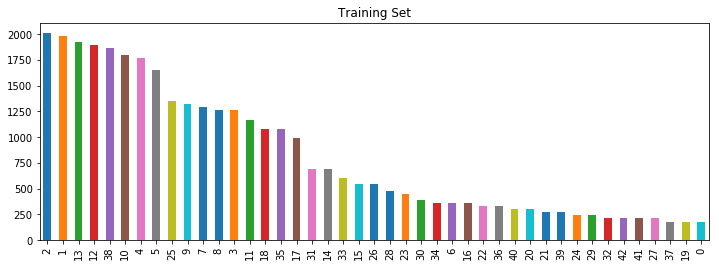

In [76]:
fig, ax = plt.subplots(figsize=(12,4))
df_train[0].value_counts().plot(ax=ax, kind='bar', title='Training Set');

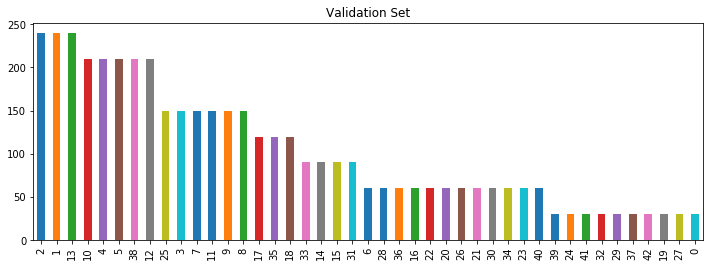

In [77]:
fig, ax = plt.subplots(figsize=(12,4))
df_valid[0].value_counts().plot(ax=ax, kind='bar', title='Validation Set');

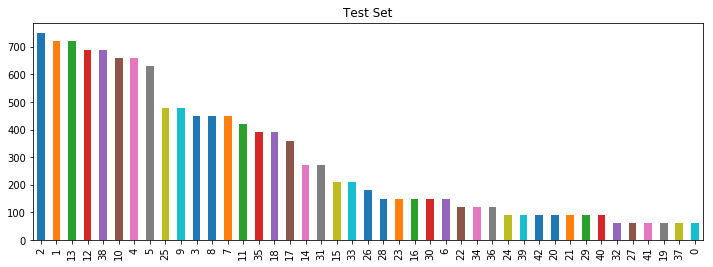

In [78]:
fig, ax = plt.subplots(figsize=(12,4))
df_test[0].value_counts().plot(ax=ax, kind='bar', title='Test Set');

In [79]:
index_to_name_dict = {}

for i in range(43):
  index_to_name_dict[i] = df_signnames.iloc[i]['SignName']

for key, value in index_to_name_dict.items():
  print(f'Category {key} = {value}')



Category 0 = Speed limit (20km/h)
Category 1 = Speed limit (30km/h)
Category 2 = Speed limit (50km/h)
Category 3 = Speed limit (60km/h)
Category 4 = Speed limit (70km/h)
Category 5 = Speed limit (80km/h)
Category 6 = End of speed limit (80km/h)
Category 7 = Speed limit (100km/h)
Category 8 = Speed limit (120km/h)
Category 9 = No passing
Category 10 = No passing for vehicles over 3.5 metric tons
Category 11 = Right-of-way at the next intersection
Category 12 = Priority road
Category 13 = Yield
Category 14 = Stop
Category 15 = No vehicles
Category 16 = Vehicles over 3.5 metric tons prohibited
Category 17 = No entry
Category 18 = General caution
Category 19 = Dangerous curve to the left
Category 20 = Dangerous curve to the right
Category 21 = Double curve
Category 22 = Bumpy road
Category 23 = Slippery road
Category 24 = Road narrows on the right
Category 25 = Road work
Category 26 = Traffic signals
Category 27 = Pedestrians
Category 28 = Children crossing
Category 29 = Bicycles crossing


38 = Keep right


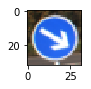

In [80]:
index = random.randint(0, n_train)
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)#, cmap="gray")
print(f'{y_train[index]}' + f' = {index_to_name_dict[y_train[index]]}')

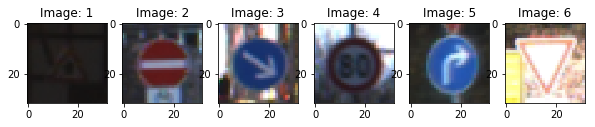

In [81]:
index = random.sample(range(0, n_train), 6)
fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(10,2))

for i, ax in enumerate(axs.flatten()):
    plt.sca(ax)
    plt.imshow(X_train[index[i]].squeeze())#, cmap=plt.cm.jet)
    plt.title('Image: {}'.format(i+1))


plt.show()



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [82]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.

X_train, y_train = shuffle(X_train, y_train)


In [83]:
X_train = X_train / 255
X_valid = X_valid / 255
X_test = X_test / 255

AttributeError: module 'tensorflow' has no attribute 'keras'

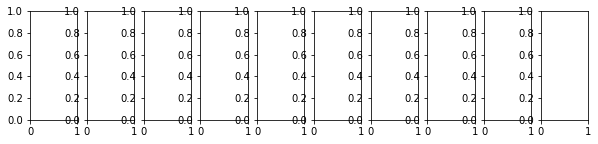

In [84]:
#import tensorflow_addons as tfa
import tensorflow as tf

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(10,2))

    for i, ax in enumerate(axs.flatten()):
        plt.sca(ax)
        plt.imshow(tf.keras.preprocessing.image.random_zoom(X_train[8], zoom_range=[0.5, 1.2], channel_axis=2).squeeze())#, cmap=plt.cm.jet)
        plt.title('Image: {}'.format(i+1))

### Model Architecture

In [85]:
### Define your architecture here.
### Feel free to use as many code cells as needed.


from tensorflow.keras import layers
tf.compat.v1.disable_eager_execution()

EPOCHS = 120
BATCH_SIZE = 128

dropout = 0.5 # Dropout 

ModuleNotFoundError: No module named 'tensorflow.keras'

In [57]:
from tensorflow.compat.v1.layers import flatten
from tensorflow.keras.layers import Dense, Dropout,Conv2D, Activation, MaxPooling2D, Flatten, Layer, BatchNormalization, GlobalMaxPool2D, Input, MaxPooling1D, Concatenate, SpatialDropout2D

keep_prob = tf.compat.v1.placeholder(tf.float32)

training_ph = tf.compat.v1.placeholder(tf.int32)

def TrafficSignNet(x, keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
      
    # Convolutional
    num_feature_maps1 = 32
    filter_size1 = 3
    conv1_W = tf.Variable(tf.random.truncated_normal(shape=(filter_size1, filter_size1, 3, num_feature_maps1), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(num_feature_maps1))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation
    conv1 = tf.nn.relu(conv1)

    num_feature_maps12 = 32
    conv12_W = tf.Variable(tf.random.truncated_normal(shape=(filter_size1, filter_size1, num_feature_maps1, num_feature_maps12), mean = mu, stddev = sigma))
    conv12_b = tf.Variable(tf.zeros(num_feature_maps12))
    conv12   = tf.nn.conv2d(conv1, conv12_W, strides=[1, 1, 1, 1], padding='VALID') + conv12_b

    # Activation
    conv12 = tf.nn.relu(conv12)

    #conv12 = SpatialDropout2D(0.5)(conv12)

    # Pooling
    conv12 = tf.nn.max_pool(conv12, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Convolutional
    num_feature_maps2 = 64
    conv2_W = tf.Variable(tf.random.truncated_normal(shape=(filter_size1, filter_size1, num_feature_maps12, num_feature_maps2), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(num_feature_maps2))
    conv2   = tf.nn.conv2d(conv12, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    num_feature_maps21 = 64
    conv21_W = tf.Variable(tf.random.truncated_normal(shape=(filter_size1, filter_size1, num_feature_maps2, num_feature_maps21), mean = mu, stddev = sigma))
    conv21_b = tf.Variable(tf.zeros(num_feature_maps21))
    conv2   = tf.nn.conv2d(conv2, conv21_W, strides=[1, 1, 1, 1], padding='VALID') + conv21_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    #conv2 = SpatialDropout2D(0.5)(conv2)

    # Pooling.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    num_feature_maps22 = 128
    conv22_W = tf.Variable(tf.random.truncated_normal(shape=(filter_size1, filter_size1, num_feature_maps2, num_feature_maps22), mean = mu, stddev = sigma))
    conv22_b = tf.Variable(tf.zeros(num_feature_maps22))
    conv22   = tf.nn.conv2d(conv2, conv22_W, strides=[1, 1, 1, 1], padding='VALID') + conv22_b
    
    # Activation
    conv22 = tf.nn.relu(conv22)


    num_feature_maps23 = 128
    conv23_W = tf.Variable(tf.random.truncated_normal(shape=(filter_size1, filter_size1, num_feature_maps22, num_feature_maps23), mean = mu, stddev = sigma))
    conv23_b = tf.Variable(tf.zeros(num_feature_maps23))
    conv22   = tf.nn.conv2d(conv22, conv23_W, strides=[1, 1, 1, 1], padding='SAME') + conv23_b

    # # Pooling
    conv22 = tf.nn.max_pool(conv22, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')


    # Flatten
    fc0   = flatten(conv22)
    
    # Dropout
    fc2 = tf.nn.dropout(fc0, keep_prob)

    fc3_W  = tf.Variable(tf.random.truncated_normal(shape=(fc2[0].shape[0], n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [58]:
x = tf.compat.v1.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.compat.v1.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

In [59]:
rate = 0.0005

logits = TrafficSignNet(x, keep_prob)
soft_max_probs = tf.nn.softmax(logits)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/legacy_tf_layers/core.py:329: UserWarning: `tf.layers.flatten` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Flatten` instead.
  warnings.warn('`tf.layers.flatten` is deprecated and '
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [60]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.compat.v1.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.compat.v1.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.0, training_ph: 0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


In [61]:
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    max_accy, epoch_max_accy = 0, 0
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            #batch_x_augmented = []
            batch_x_augmented2 = []
            for image in batch_x:
              #batch_x_augmented.append(tf.keras.preprocessing.image.random_rotation(image, 45, channel_axis=2))
              #batch_x_augmented.append(tf.keras.preprocessing.image.random_brightness(image, brightness_range=[0.4,1.2]))
              batch_x_augmented2.append(tf.keras.preprocessing.image.random_zoom(image, zoom_range=[0.5, 1.2], channel_axis=2))

            #sess.run(training_operation, feed_dict={x: batch_x_augmented, y: batch_y, keep_prob: dropout, training_ph: 1})
            sess.run(training_operation, feed_dict={x: batch_x_augmented2, y: batch_y, keep_prob: dropout, training_ph: 1})
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: dropout, training_ph: 1})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        if validation_accuracy > max_accy:
          max_accy = validation_accuracy
          epoch_max_accy = i
        
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess,'TrafficSignNet_model.ckpt')
    print("Model saved")
    print(f'Max Validation Accuracy = {max_accy} on Epoch = {epoch_max_accy}')

Training...

EPOCH 1 ...
Validation Accuracy = 0.918

EPOCH 2 ...
Validation Accuracy = 0.949

EPOCH 3 ...
Validation Accuracy = 0.964

EPOCH 4 ...
Validation Accuracy = 0.969

EPOCH 5 ...
Validation Accuracy = 0.968

EPOCH 6 ...
Validation Accuracy = 0.976

EPOCH 7 ...
Validation Accuracy = 0.977

EPOCH 8 ...
Validation Accuracy = 0.979

EPOCH 9 ...
Validation Accuracy = 0.974

EPOCH 10 ...
Validation Accuracy = 0.978

EPOCH 11 ...
Validation Accuracy = 0.980

EPOCH 12 ...
Validation Accuracy = 0.977

EPOCH 13 ...
Validation Accuracy = 0.981

EPOCH 14 ...
Validation Accuracy = 0.973

EPOCH 15 ...
Validation Accuracy = 0.977

EPOCH 16 ...
Validation Accuracy = 0.970

EPOCH 17 ...
Validation Accuracy = 0.980

EPOCH 18 ...
Validation Accuracy = 0.979

EPOCH 19 ...
Validation Accuracy = 0.984

EPOCH 20 ...
Validation Accuracy = 0.986

EPOCH 21 ...
Validation Accuracy = 0.986

EPOCH 22 ...
Validation Accuracy = 0.980

EPOCH 23 ...
Validation Accuracy = 0.980

EPOCH 24 ...
Validation Accura

In [62]:
# Accuracy on the test set

with tf.compat.v1.Session() as sess:
    saver.restore(sess, 'TrafficSignNet_model.ckpt')

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from /content/gdrive/My Drive/CarND-Traffic-Sign-Classifier-Project/TrafficSignNet_model.ckpt
Test Accuracy = 0.984


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

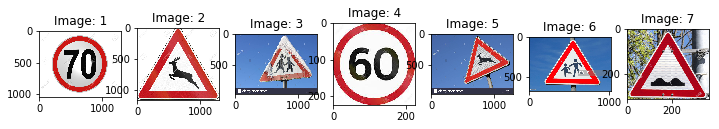

In [67]:
### Load the images and plot them here.
import glob
images = glob.glob('GTS_Examples/GTS*')

fig, axs = plt.subplots(nrows=1, ncols=len(images), figsize=(12,4))
for i, ax in enumerate(axs.flatten()):
    plt.sca(ax)
    plt.imshow(plt.imread(images[i]))#, cmap=plt.cm.jet)
    plt.title('Image: {}'.format(i+1))


plt.show()

In [68]:
len(images)

7

### Predict the Sign Type for Each Image

In [100]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.

In [86]:
# Resizing to 32x32

from PIL import Image 

GTS_images_resized = []
newsize = (32, 32) 
for im in images:
  GTS_images_resized.append(np.array(Image.open(im).resize(newsize)))

In [87]:
# Rescaling/preprocessing

GTS_images_resized = np.asarray(GTS_images_resized) / 255

In [88]:
len(GTS_images_resized)

7

In [89]:
saver = tf.compat.v1.train.Saver()

outputs_preds = []
soft_max_probs_out = []

# Launch the graph
with tf.compat.v1.Session() as sess:
    saver.restore(sess, 'TrafficSignNet_model.ckpt')

    batch_x = GTS_images_resized
    logits_out = sess.run(logits, feed_dict={x: batch_x, keep_prob: 0.0})
    soft_max_probs_out = sess.run(tf.nn.softmax(logits_out))
    outputs_preds = sess.run(tf.argmax(logits_out, 1))
    print(outputs_preds)




INFO:tensorflow:Restoring parameters from /content/gdrive/My Drive/CarND-Traffic-Sign-Classifier-Project/TrafficSignNet_model.ckpt
[ 4 22 28 37 41 31  2]


In [ ]:
outputs_preds

array([31, 40, 40, 11, 33,  5,  4, 38,  1, 40, 32])

In [ ]:
soft_max_probs_out[9]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

Prediction: Speed limit (70km/h)
Prediction: Bumpy road
Prediction: Children crossing
Prediction: Go straight or left
Prediction: End of no passing
Prediction: Wild animals crossing
Prediction: Speed limit (50km/h)


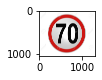

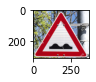

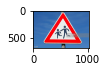

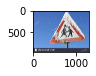

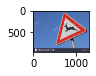

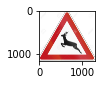

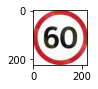

In [90]:
for i, i_pred in enumerate(outputs_preds):
  # image = GTS_images_resized[i].squeeze()
  # plt.figure(figsize=(1,1))
  # plt.imshow(image)
  plt.figure(figsize=(1,1))
  plt.imshow(plt.imread(images[i]))
  print(f'Prediction: {index_to_name_dict[i_pred]}')

### Analyze Performance

In [86]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

print(f'Accuracy on new/unseen images = {4 / 7:.2}')


Accuracy on new/unseen images = 0.57


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [91]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 

with tf.compat.v1.Session() as sess:
    saver.restore(sess, 'TrafficSignNet_model.ckpt')
    top_k_outputs = sess.run(tf.nn.top_k(soft_max_probs_out, k=5)) 


INFO:tensorflow:Restoring parameters from /content/gdrive/My Drive/CarND-Traffic-Sign-Classifier-Project/TrafficSignNet_model.ckpt


In [92]:
float_formatter = "{:.3f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

for i in range(len(outputs_preds)):
  pred_labels = []
  for indx in top_k_outputs.indices[i]:
     pred_labels.append(index_to_name_dict[indx])
  
  print(f'Top 5 probs:{top_k_outputs.values[i]} \nand corresponding classes:\n {pred_labels}\n')

Top 5 probs:[1.000 0.000 0.000 0.000 0.000] 
and corresponding classes:
 ['Speed limit (70km/h)', 'Speed limit (20km/h)', 'Road narrows on the right', 'Speed limit (30km/h)', 'Traffic signals']

Top 5 probs:[1.000 0.000 0.000 0.000 0.000] 
and corresponding classes:
 ['Bumpy road', 'Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)']

Top 5 probs:[1.000 0.000 0.000 0.000 0.000] 
and corresponding classes:
 ['Children crossing', 'Bicycles crossing', 'Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)']

Top 5 probs:[1.000 0.000 0.000 0.000 0.000] 
and corresponding classes:
 ['Go straight or left', 'Ahead only', 'Right-of-way at the next intersection', 'Turn right ahead', 'Slippery road']

Top 5 probs:[0.960 0.040 0.000 0.000 0.000] 
and corresponding classes:
 ['End of no passing', 'No entry', 'Priority road', 'No passing', 'Go straight or right']

Top 5 probs:[1.000 0.000 0.000 0.000 0.000] 
and corresponding classes:
 ['Wil